In [1]:
import pandas as pd
import matplotlib

In [2]:
df = pd.read_csv('data/flat_data_2020.csv',nrows=10000)

In [3]:
for col in df.columns:
    print(col)

Unnamed: 0
_id
created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
geo
coordinates
place
contributors
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
favorited
retweeted
filter_level
lang
matching_rules
timestamp
valid_time
period
AdTitle
Brand
sentiment
user.id
user.id_str
user.name
user.screen_name
user.location
user.url
user.description
user.translator_type
user.protected
user.verified
user.followers_count
user.friends_count
user.listed_count
user.favourites_count
user.statuses_count
user.created_at
user.utc_offset
user.time_zone
user.geo_enabled
user.lang
user.contributors_enabled
user.is_translator
user.profile_background_color
user.profile_background_image_url
user.profile_background_image_url_https
user.profile_background_tile
user.profile_link_color
user.profile_sidebar_border_color
user.profile_sidebar_fill_color
user.profile_text_color
user.profile_u

In [4]:
df[['text', 'geo','reply_count', 'retweet_count', 'favorite_count', 'timestamp', 'valid_time', 'period', 'AdTitle', 'Brand', 'sentiment', 'entities.user_mentions']].sort_values(by=['retweet_count'], ascending=False)

,text,geo,reply_count,retweet_count,favorite_count,timestamp,valid_time,period,AdTitle,Brand,sentiment,entities.user_mentions
7381,Saving the world (again) &gt; laundry #SuperBo...,NaN,87,1218,3998,1.580695e+09,True,3,"Super Bowl Now, #LaundryLater",Bud Light X Tide,neutral,[]
8578,Even we wouldn't do laundry during the #SuperB...,NaN,119,293,2142,1.580688e+09,True,1,"Super Bowl Now, #LaundryLater",Bud Light X Tide,neutral,"[{'screen_name': 'EmilyHampshire', 'name': 'Em..."
8530,"Reminiscing now, #LaundryLater\n\n@Tide | #Sup...",NaN,27,200,2710,1.580688e+09,True,1,Finally Later,Tide,neutral,"[{'screen_name': 'tide', 'name': 'Tide', 'id':..."
5067,Really proud of The Fugitive on @Quibi. I hope...,NaN,89,199,1188,1.580688e+09,True,1,Bank Heist,Quibi,positive,"[{'screen_name': 'Quibi', 'name': 'Quibi', 'id..."
8584,"Super Bowl now, #LaundryLater @Tide #ad https:...",NaN,80,164,2829,1.580688e+09,True,1,Finally Later,Tide,positive,"[{'screen_name': 'tide', 'name': 'Tide', 'id':..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,@True_Canuck1 The absolute lies of this commen...,NaN,0,0,0,1.580689e+09,True,1,Can't Touch This,Cheetos,negative,"[{'screen_name': 'True_Canuck1', 'name': 'Davi..."
3445,RT @jessfufu: chinese people are being demonis...,NaN,0,0,0,1.580689e+09,True,1,Bank Heist,Quibi,negative,"[{'screen_name': 'jessfufu', 'name': 'Jess Fu'..."
3446,RT @jessfufu: chinese people are being demonis...,NaN,0,0,0,1.580689e+09,True,1,Bank Heist,Quibi,negative,"[{'screen_name': 'jessfufu', 'name': 'Jess Fu'..."
3447,RT @jessfufu: chinese people are being demonis...,NaN,0,0,0,1.580689e+09,True,1,Bank Heist,Quibi,negative,"[{'screen_name': 'jessfufu', 'name': 'Jess Fu'..."


In [43]:
x = df['text'].tail(1)

In [41]:
pd.options.display.max_colwidth = 150

In [44]:
print(x)

9999    sorry I'm currently doing my laundry. https://t.co/Q9rmgNFLTP
Name: text, dtype: object


<AxesSubplot:xlabel='Brand'>

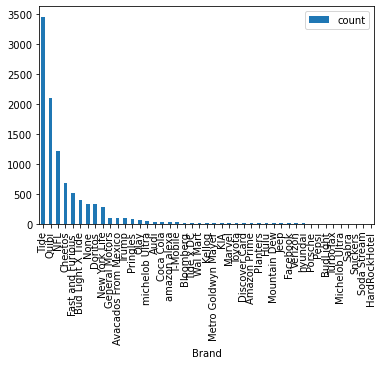

In [9]:
df['text'].groupby(df['Brand']).agg(['count']).sort_values(by=['count'], ascending=False).plot.bar()

In [16]:
df['sentiment_index'].unique()

array([-1,  1,  0])

In [15]:
sentiment_index = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}
df['sentiment_index'] = df['sentiment'].map(sentiment_index)

<AxesSubplot:xlabel='Brand'>

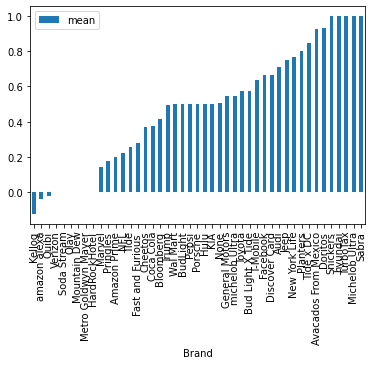

In [27]:
df['sentiment_index'].groupby(df['Brand']).mean().sort_values(by=['mean'], ascending=True).plot.bar()

In [94]:
x = df['sentiment_index'].groupby(df['Brand']).agg(['mean', 'count']).sort_values(by=['count'], ascending=True)

In [105]:
x

,mean,count
Brand,,
Sabra,1.000000,1
Snickers,1.000000,1
Soda Stream,0.000000,1
HardRockHotel,0.000000,1
Pepsi,0.500000,2
BudLight,0.500000,2
Michelob Ultra,1.000000,2
TurboTax,1.000000,2
Porsche,0.500000,2


In [106]:
x = df['sentiment_index'].groupby(df['Brand']).mean().to_dict()

In [108]:
for file in os.listdir('data/split_files'):
    df = pd.read_csv(file)

dict

In [74]:
brands = {b:'' for b in df['Brand'].unique()}

In [113]:
x = dict()
for file in os.listdir('data/split_files'):
    path = f'data/split_files/{file}'
    df = pd.read_csv(path)
    df['sentiment_index'] = df['sentiment'].map(sentiment_index)
    x = df['sentiment_index'].groupby(df['Brand']).mean().to_dict()
x

{'Amazon Prime': 0.25,
 'Audi': 0.6363636363636364,
 'Avacados From Mexico': 0.16546363131593558,
 'Bloomberg': 0.23684210526315788,
 'BudLight': -0.25,
 'Budwieser': 1.0,
 'Cheetos': 0.0,
 'Coca Cola': 0.2,
 'Discover Card': 0.5,
 'Doritos': 0.3333333333333333,
 'Facebook': -0.3333333333333333,
 'General Motors': -0.05333333333333334,
 'Google': 0.0,
 'HardRockHotel': -0.3231707317073171,
 'Heinz': 0.0,
 'Jeep': 0.4,
 'KIA': 0.6190476190476191,
 'Kellog': 0.3333333333333333,
 'Metro Goldwyn Mayer': 0.42857142857142855,
 'New York Life': 1.0,
 'None': 0.21367521367521367,
 'Pepsi': 0.2,
 'Planters': 0.3333333333333333,
 'Pringles': 0.43586329338659563,
 'Reeses': 0.0,
 'Sabra': -0.05,
 'Soda Stream': 0.6666666666666666,
 'T-Mobile': 0.6363636363636364,
 'Tide': 0.3333333333333333,
 'Toyota': 1.0,
 'Trump': 0.014285714285714285,
 'TurboTax': 1.0,
 'Turkish Airlines': 0.0,
 'Verizon': 1.0,
 'Wal Mart': -0.5384615384615384,
 'amazon alexa': 0.45454545454545453,
 'hyundai': 1.0,
 'michelob